In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data
data_2015 = pd.read_csv('C:/Users/MZ02-JULEE/Downloads/2015.csv')
data_2016 = pd.read_csv('C:/Users/MZ02-JULEE/Downloads/2016.csv')

In [5]:
result_2015 = data_2015.drop(['Country', 'Region', 'Happiness Rank'], axis=1)

In [7]:
result_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Score                158 non-null    float64
 1   Economy (GDP per Capita)       158 non-null    float64
 2   Family                         158 non-null    float64
 3   Health (Life Expectancy)       158 non-null    float64
 4   Freedom                        158 non-null    float64
 5   Trust (Government Corruption)  158 non-null    float64
 6   Generosity                     158 non-null    float64
 7   Dystopia Residual              158 non-null    float64
dtypes: float64(8)
memory usage: 10.0 KB


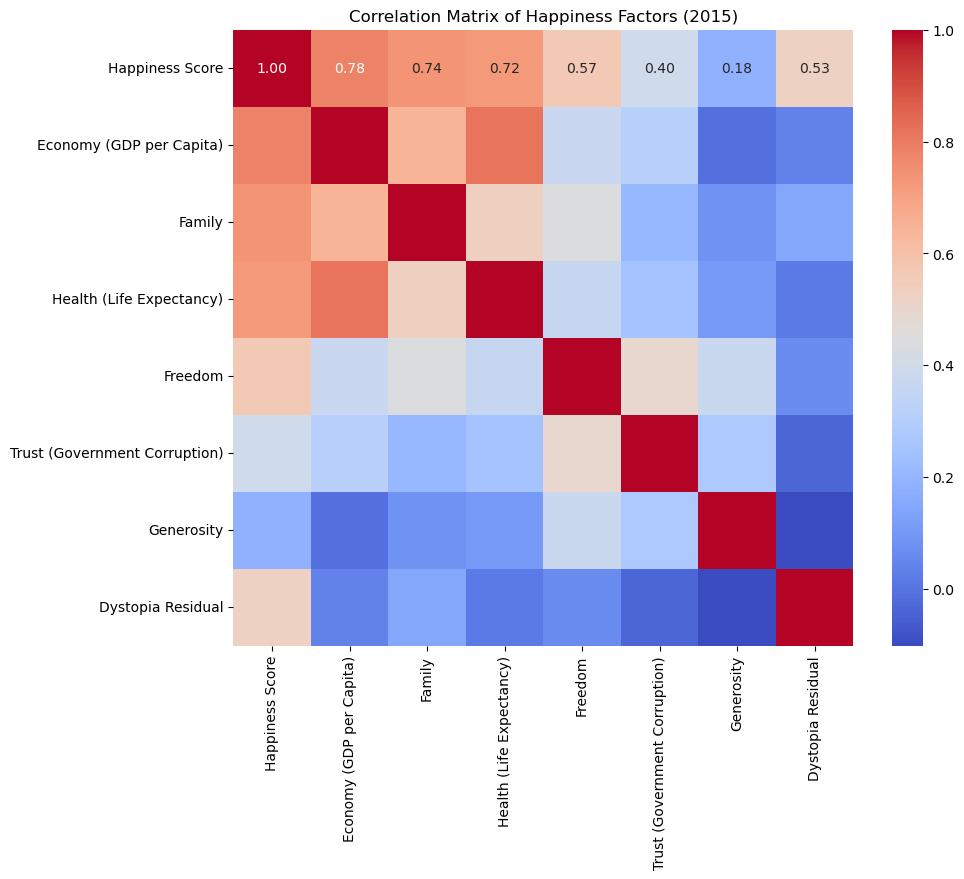

In [8]:
# Create and visualize the correlation matrix
correlation_matrix = result_2015.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Happiness Factors (2015)")
plt.show()

In [10]:
# Select features
features = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
            'Freedom', 'Trust (Government Corruption)', 'Generosity']
target = 'Happiness Score'

In [11]:
# Split data
X = result_2015[features]
y = result_2015[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

linear_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)
y_pred_gb = gradient_boosting_model.predict(X_test)

# Evaluate model performance
linear_rmse = mean_squared_error(y_test, y_pred_linear, squared=False)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
gb_rmse = mean_squared_error(y_test, y_pred_gb, squared=False)

linear_r2 = r2_score(y_test, y_pred_linear)
rf_r2 = r2_score(y_test, y_pred_rf)
gb_r2 = r2_score(y_test, y_pred_gb)

# Print results
print(f"Linear Regression RMSE: {linear_rmse}, R2: {linear_r2}")
print(f"Random Forest RMSE: {rf_rmse}, R2: {rf_r2}")
print(f"Gradient Boosting RMSE: {gb_rmse}, R2: {gb_r2}")


Linear Regression RMSE: 0.49187277657503836, R2: 0.8294705100069292
Random Forest RMSE: 0.519719391096051, R2: 0.8096154236105478
Gradient Boosting RMSE: 0.5886388271209285, R2: 0.7557740934318778


In [12]:
# Predict 2016 data
X_2016 = data_2016[features]
y_2016 = data_2016[target]
y_pred_2016 = linear_model.predict(X_2016)
rmse_2016 = mean_squared_error(y_2016, y_pred_2016, squared=False)
r2_2016 = r2_score(y_2016, y_pred_2016)
print(f"2016 Prediction RMSE: {rmse_2016}, R2: {r2_2016}")

2016 Prediction RMSE: 0.6197744024324526, R2: 0.7034086572483969
